# Gibbs Sampling

La finalidad del sampleo es encontrar los parámetros 

In [1]:
import utils as ut
import pickle
import scipy.stats as stats

DATA_PATH = '/home/chrisams/Documents/datasets/data_TAIM/processed/'
STATS_PATH = '/home/chrisams/Documents/datasets/data_TAIM/stats.pickle'
#DATA_PATH = 'C:/Users/Samuel/Desktop/2018_01/IIC 3695 Intel Maquina/Tareas y Proyecto/Proyecto/Code/TAIM/data'
q = stats.norm(loc=0, scale=1)
K = 3
p = 1
iters = 2
debug = False
n_rows = 10000 # Number of rows of the data to load

samples = ut.gibbs_sampling(iters, DATA_PATH, K, p, q, n_rows=n_rows, debug=debug)

Loading data...
Iteration 0
Iteration 1
Finished!


In [2]:
print(samples[0][0])
print(samples[0][1])

[[ 0.91590462 -0.4017661  -0.56715659]
 [ 0.07842249  0.01330037  0.64931421]
 [ 0.54464072  0.30452251 -0.07674132]]
[[ 0.59785836 -0.19888019  0.23881772]
 [-0.19888019  3.29801921 -0.72782777]
 [ 0.23881772 -0.72782777  0.3294783 ]]


[[ 0.59785836 -0.19888019  0.23881772]
 [-0.19888019  3.29801921 -0.72782777]
 [ 0.23881772 -0.72782777  0.3294783 ]]
[3.48817132 0.64832662 0.08885794]


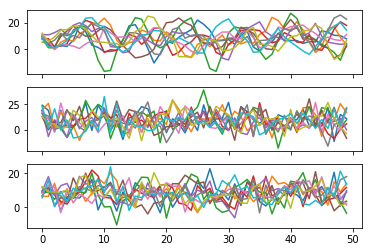

In [3]:
import numpy as np
x0 = np.transpose(np.matrix([[0.3,0.4,0.7]]))
A = samples[0][0]
CovU = samples[0][1]

print(CovU)
eigval = np.linalg.eigvals(CovU)
print(eigval)
#print(np.all(np.isreal(eigval)))

horizon = 50
n_samples = 10
time_series = ut.sim_wind(A,CovU,x0,horizon,n_samples)

# Adjust time series with their true mean and std.
with open(STATS_PATH, 'rb') as fp:
    stats_dict = pickle.load(fp)

total_mean = 0
total_std = 0
for i in range(K):
    total_mean += stats_dict['plant_{}'.format(i)]['mean']
    total_std += stats_dict['plant_{}'.format(i)]['std']

total_mean = total_mean / K
total_std = total_std / K

time_series = time_series * total_std + total_mean

#Grafica series de tiempos resultantes
ut.plot_series(time_series)
